In [26]:
#Linear regression to analysis profit vs population
#Used single for loop for gradient descent (gradient descent1())

import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

path="ML/ex1data1.txt"
data = pd.read_csv(path,header=None,names=['Population','Profit'])

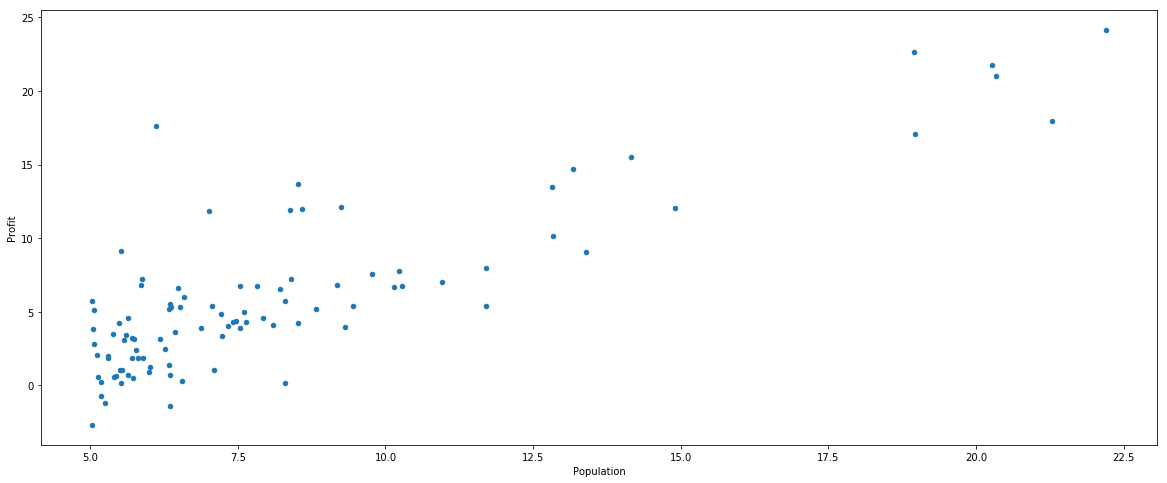

In [27]:
#Plotting
data.plot(kind='scatter',x='Population',y='Profit',figsize=(20,8))

In [28]:
#find J =1/2m(h(x)-y)^2
def computeCost(X, y, theta):
    cost = np.sum(np.power(((X * theta.T) - y), 2)) / (2 * len(X))
    return cost

In [29]:
data.insert(0, 'Ones', 1)

In [31]:
cols=data.shape[1]
print (cols)
X=data.iloc[:,0:cols-1]
print (X)
y=data.iloc[:,cols-1:cols]
print (y)

3
    Ones  Population
0      1      6.1101
1      1      5.5277
2      1      8.5186
3      1      7.0032
4      1      5.8598
5      1      8.3829
6      1      7.4764
7      1      8.5781
8      1      6.4862
9      1      5.0546
10     1      5.7107
11     1     14.1640
12     1      5.7340
13     1      8.4084
14     1      5.6407
15     1      5.3794
16     1      6.3654
17     1      5.1301
18     1      6.4296
19     1      7.0708
20     1      6.1891
21     1     20.2700
22     1      5.4901
23     1      6.3261
24     1      5.5649
25     1     18.9450
26     1     12.8280
27     1     10.9570
28     1     13.1760
29     1     22.2030
..   ...         ...
67     1     10.2360
68     1      5.4994
69     1     20.3410
70     1     10.1360
71     1      7.3345
72     1      6.0062
73     1      7.2259
74     1      5.0269
75     1      6.5479
76     1      7.5386
77     1      5.0365
78     1     10.2740
79     1      5.1077
80     1      5.7292
81     1      5.1884
82     1   

In [109]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [110]:
#Inspect theta, X.shape, theta.shape, y.shape by just keying in the terms and running the cells
computeCost(X, y, theta)

32.072733877455676

In [111]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
    return theta, cost

In [131]:
#ref: https://medium.com/we-are-orb/multivariate-linear-regression-in-python-without-scikit-learn-7091b1d45905
def gradientDescent1(X, y, theta, alpha, iters):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X.T * (X @ theta.T - y))
        cost[i] = computeCost(X, y, theta)
    
    return theta,cost


In [132]:
alpha = 0.01
iters = 1000

In [133]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g1, cost1 = gradientDescent1(X, y, theta, alpha, iters)

In [134]:
c1=computeCost(X, y, g)
c2=computeCost(X, y, g1)
print (c1)
print (c2)

4.515955503078912
6.420888758761032


In [135]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)
f1 = g1[0, 0] + (g1[0, 1] * x)

Text(0.5,1,'Predicted Profit vs. Population Size (legacy)')

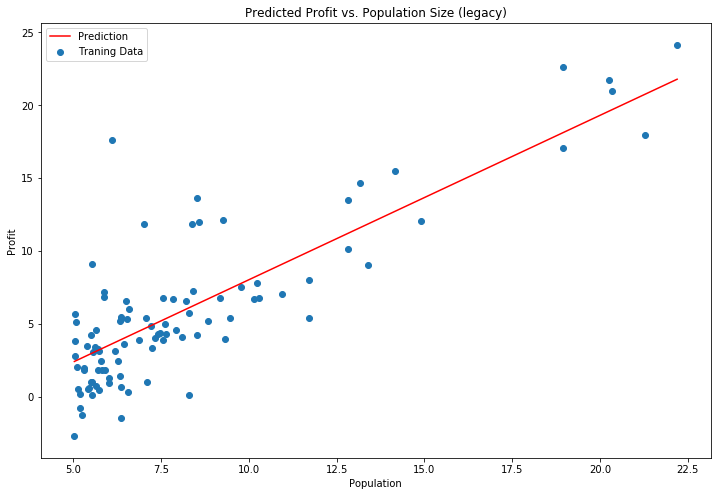

In [140]:
fig, ax = plot.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size (legacy)')

Text(0.5,1,'Predicted Profit vs. Population Size (new)')

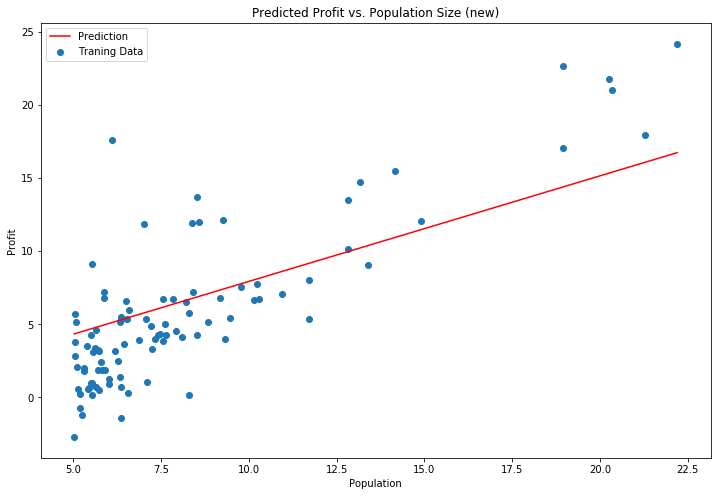

In [141]:
fig, ax = plot.subplots(figsize=(12,8))
ax.plot(x, f1, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size (new)')

Text(0.5,1,'Error vs. Training Epoch')

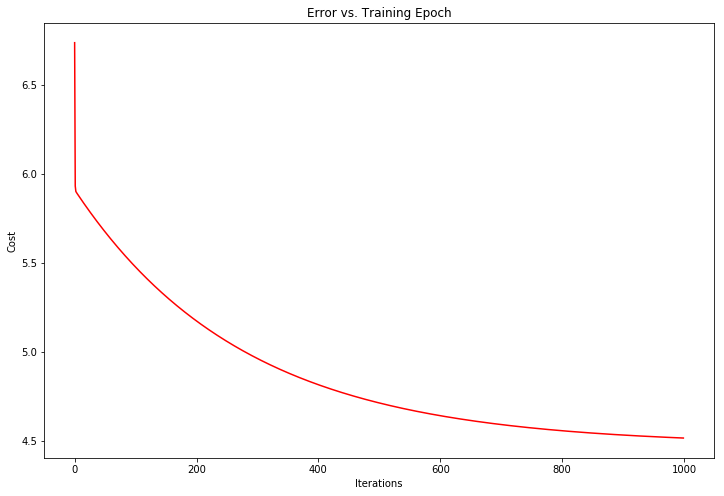

In [138]:
fig, ax = plot.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch (legacy)')

Text(0.5,1,'Error vs. Training Epoch (new)')

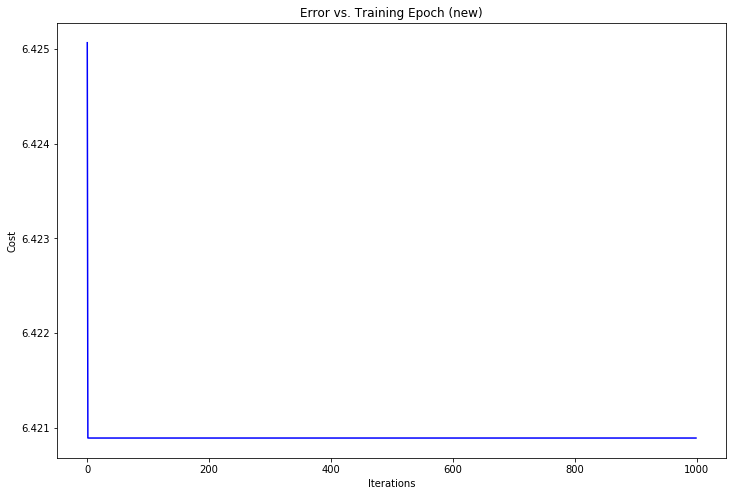

In [139]:
fig, ax = plot.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost1, 'b')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch (new)')